In [15]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# bringing in the dataset
food_data_path = "Resources/FoodDesert2015.csv"

food_df = pd.read_csv(food_data_path)

In [17]:
food_df.head(10)

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488
5,1001020600,Alabama,Autauga,1,3668,1311,0,0,0.000000,0,...,411,2751,740,9,1,10,157,176,49,118
6,1001020700,Alabama,Autauga,1,2891,1188,0,36,0.012452,1,...,360,2333,435,13,3,11,96,98,134,218
7,1001020801,Alabama,Autauga,0,3081,1074,0,0,0.000000,0,...,341,2690,278,16,0,27,70,57,126,115
8,1001020802,Alabama,Autauga,0,10435,3694,0,0,0.000000,0,...,1060,8744,1387,61,7,49,187,159,82,367
9,1001020900,Alabama,Autauga,0,5675,2067,0,14,0.002467,0,...,630,4835,679,20,3,14,124,96,32,394


In [18]:
#create list for x_tick values
state_list = ["Missouri"]

In [19]:
#filter dataframe by Missouri
missouri_df = food_df[food_df["State"] == "Missouri"]
missouri_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
37373,29001950100,Missouri,Adair,0,3802,1456,0,0,0.000000,0,...,553,3720,7,21,0,17,37,22,43,88
37374,29001950200,Missouri,Adair,0,3019,1223,0,0,0.000000,0,...,510,2964,5,8,0,12,30,22,35,145
37375,29001950300,Missouri,Adair,1,2951,1388,0,52,0.017621,0,...,269,2721,49,73,3,10,95,77,214,241
37376,29001950400,Missouri,Adair,0,3892,1727,0,41,0.010534,0,...,663,3703,36,60,4,13,76,83,103,206
37377,29001950500,Missouri,Adair,1,7079,2992,0,379,0.053539,1,...,998,6581,149,134,2,20,193,172,337,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38761,29510127200,Missouri,St. Louis City,1,4075,2100,0,199,0.048834,0,...,515,3100,651,195,0,12,117,124,209,146
38762,29510127300,Missouri,St. Louis City,1,3769,1643,0,131,0.034757,0,...,352,1040,2523,86,0,10,110,54,239,375
38763,29510127400,Missouri,St. Louis City,1,4795,2046,0,0,0.000000,0,...,346,1206,3438,48,1,8,94,62,694,981
38764,29510127500,Missouri,St. Louis City,1,2237,1264,0,12,0.005364,0,...,180,521,1649,21,1,1,44,30,365,327


In [20]:
#find the total population of Missouri(with the counties that are given in the dataframe)
total_pop = missouri_df["POP2010"].sum()
#find the count of the population that lives 1 mile or further from a supermarket
total_low_access_pop_count = round(missouri_df["lapop1"].sum(),2)

In [21]:
# OTHER
#create a list of columns to be sumed for data
col1 = ['lanhopi1', 'laaian1','laomultir1']
col2 = ['TractNHOPI','TractAIAN','TractOMultir']
#gather relevant data on other race using the following columns:
other_race_df = missouri_df[['County','lanhopi1', 'laaian1','laomultir1','TractNHOPI','TractAIAN','TractOMultir']]
#group other_race data by County
other_race_sum = other_race_df.groupby(['County'], as_index=False).sum()
#change groupby dataframe name for clarity
other_race_df = other_race_sum
#create a column that contains the sum of col1
other_race_df['Other Race Sum']= other_race_sum[col1].sum(axis=1)
#repeat for column2
other_race_df['Other Total Pop Race Sum']= other_race_sum[col2].sum(axis=1)


total_other_pop = other_race_df['Other Total Pop Race Sum'].sum()
percent_other = round((total_other_pop/total_pop)*100,2)
other_mile_count = round(other_race_df["Other Race Sum"].sum(),2)
other_mile_percent = round((other_mile_count/total_other_pop)*100,2)

In [22]:
# WHITE
total_white_pop = missouri_df["TractWhite"].sum()
percent_white = round((total_white_pop/total_pop)*100,2)
white_mile_count = round(missouri_df["lawhite1"].sum(),2)
white_mile_percent = round((white_mile_count/total_white_pop)*100,2)

In [23]:
# BLACK
total_black_pop = missouri_df["TractBlack"].sum()
percent_black = round((total_black_pop/total_pop)*100,2)
black_mile_count = round(missouri_df["lablack1"].sum(),2)
black_mile_percent = round((asian_mile_count/total_black_pop)*100,2)

In [24]:
# HISPANIC
total_hisp_pop = missouri_df["TractHispanic"].sum()
percent_hisp = round((total_hisp_pop/total_pop)*100,2)
hisp_mile_count = round(missouri_df["lahisp1"].sum(),2)
hisp_mile_percent = round((hisp_mile_count/total_hisp_pop)*100,2)

In [25]:
# ASIAN
total_asian_pop = missouri_df["TractAsian"].sum()
percent_asian = round((total_asian_pop/total_pop)*100,2)
asian_mile_count = round(missouri_df["laasian1"].sum(),2)
asian_mile_percent = round((asian_mile_count/total_asian_pop)*100,2)

In [26]:
new_df = pd.DataFrame({"Asian Stats": [total_asian_pop,total_pop,percent_asian,asian_mile_count,asian_mile_percent,total_pop_count]
                       })
new_df

,Asian Stats
0,98083.00
1,5988927.00
2,1.64
3,33401.50
4,34.05
5,2943911.27


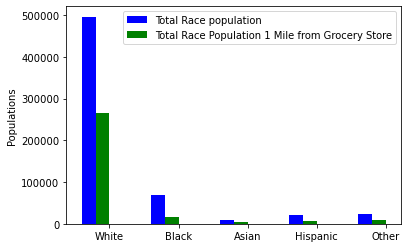

In [66]:
x = ['White', 'Black', 'Asian', 'Hispanic', 'Other']
ind = np.arange(len(x))  # the x locations for the groups
w = 0.1       # the width of the bars
y_ticks = np.arange(0, 600000, 100000)

y = [total_white_pop, total_black_pop, total_asian_pop, total_hisp_pop, total_other_pop]
z = [white_mile_count, black_mile_count, asian_mile_count, hisp_mile_count, other_mile_count]

ax = plt.subplot(111)
ax.bar(ind-w, y, width=0.2, color='b', align='center', label="Total Race population")
ax.bar(ind+w, z, width=0.2, color='g', align='center', label="Total Race Population 1 Mile from Grocery Store")

ax.set_ylabel('Populations')
ax.set_yticklabels(y_ticks)
ax.set_xticks(ind+width)
ax.set_xticklabels(x)

plt.legend()
plt.title("Missouri Food Desert Race Population Demographics")

plt.show()